# Predicting heart-disease using machine-learning

predicting whether someone has heart-disease or not based on data science and machine-learning tools.

We're going to take the following approach:
1. problem definition
2. data
3. evaluation.
4. features
5. modelling
6. experimentation

### 1. Problem Definition

 Given clinical parameters, 
 
  > we have to predict whether some patient has heart-disease or not.

### 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

### 3. Evaluation

> if we can reach 95% accuracy at predicting whether or not a patient has heart-disease during the proof of concept, we'll pursue the project.

### 4. Features

Details about different columns in heart-disease file.

**Create data dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
   * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
       * can range from mild symptoms to severe problems signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy 
       * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
   * looks at stress of heart during excercise
   * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
   * 1: Flatsloping: minimal change (typical healthy heart)
   * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
   * colored vessel means the doctor can see the blood passing through
   * the more blood movement the better (no clots)
13. thal - thalium stress result
   * 1,3: normal
   * 6: fixed defect: used to be defect but ok now
   * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
we're going to use pandas, numpy and matplotlin or data analysis and manipulation.

In [1]:
!pip install seaborn

In [2]:
# import all tools we need

# regular EDA(exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# import models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [3]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


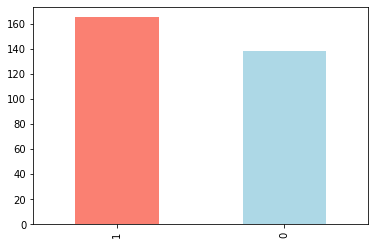

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

### Heart disease frequency acccording to sex

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


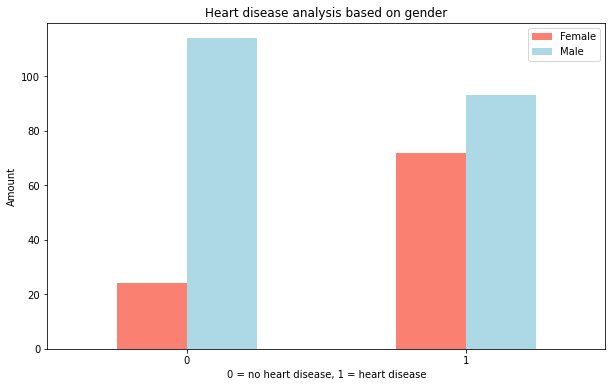

In [9]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color= ["salmon", "lightblue"]);

plt.title("Heart disease analysis based on gender")
plt.xlabel("0 = no heart disease, 1 = heart disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs. Max heart rate for heart disease 

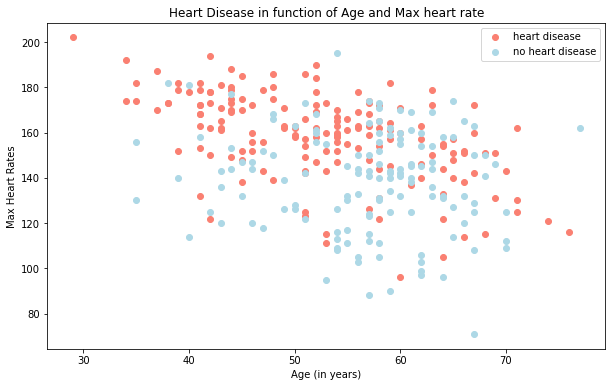

In [11]:
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target ==1],
           df.thalach[df.target ==1],
           c="salmon")

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# info
plt.title("Heart Disease in function of Age and Max heart rate")
plt.xlabel("Age (in years)")
plt.ylabel("Max Heart Rates")
plt.legend(["heart disease", "no heart disease"]);

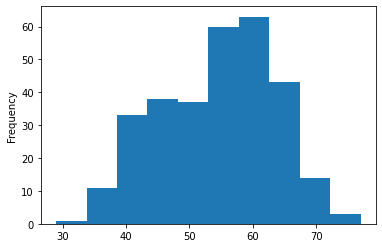

In [12]:
# frquency of heart-disease based on age
df.age.plot.hist();

### Heart disease frequency per Chest pain type

3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease

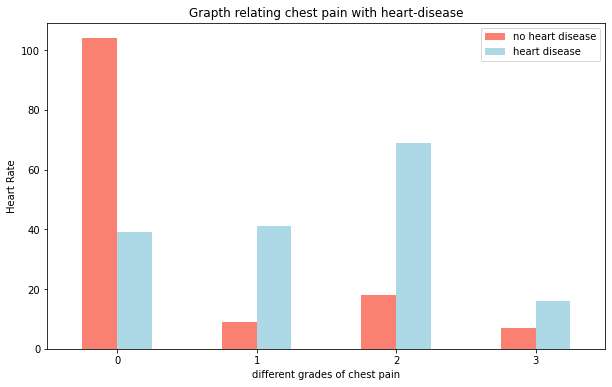

In [13]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);

#adding info
plt.title("Grapth relating chest pain with heart-disease")
plt.xlabel("different grades of chest pain")
plt.ylabel("Heart Rate")
plt.legend([ "no heart disease", "heart disease"])
plt.xticks(rotation=0);

In [14]:
# correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


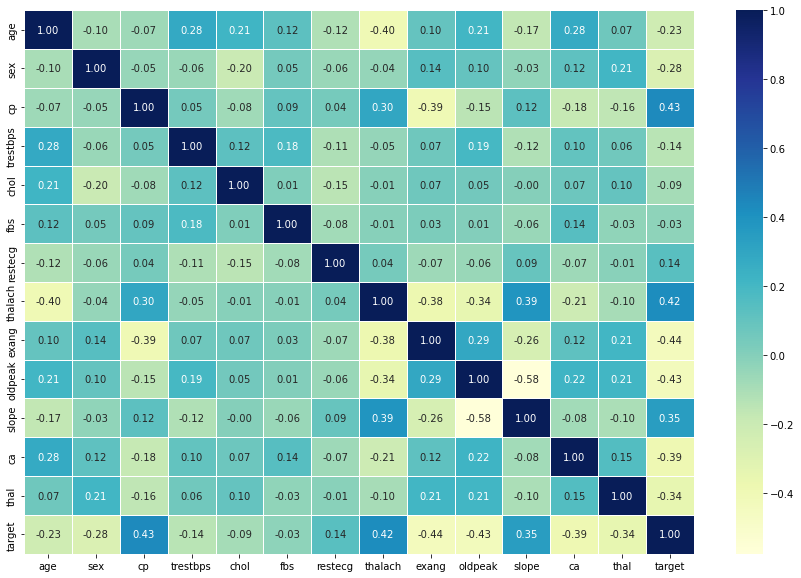

In [15]:
# making correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots( figsize= (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths= 0.5,
                fmt=".2f",
                cmap= "YlGnBu")

### 5. Modelling

we're going to use 3 models for classification:

1. Logistic regression
2. K neighbours classifier
3. Random Forest Classifier

In [16]:
#split data into x and y
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# models we use to evaluate
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\sonam\desktop\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8478260869565217,
 'KNN': 0.7391304347826086,
 'Random Forest': 0.8913043478260869}

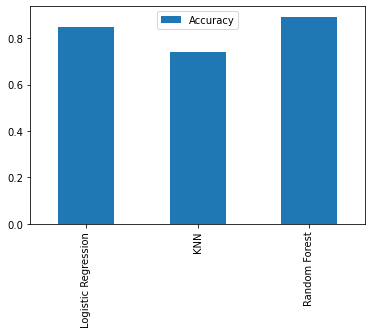

In [18]:
model_compare = pd.DataFrame(model_scores, index= ["Accuracy"])
model_compare.T.plot.bar();

Now we've got our our baseline model, it's time to improve those models.
let's look at the following:
* hyperparameter tuning
* feature importance
* confusion matrix
* cross-validation
* precision 
* f1 score
* classification report
* ROC curve
* area under curve

### Hyperparameter tuning by hand

In [19]:
# tuning the KNN
train_scores = []
test_scores = []

# setting the parameter k neighbors
neighbors = range(1,21)

#setting up knn instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [20]:
train_scores

[1.0,
 0.7937743190661478,
 0.77431906614786,
 0.7509727626459144,
 0.77431906614786,
 0.754863813229572,
 0.7392996108949417,
 0.7237354085603113,
 0.7003891050583657,
 0.6964980544747081,
 0.6964980544747081,
 0.6964980544747081,
 0.7120622568093385,
 0.7120622568093385,
 0.6964980544747081,
 0.7120622568093385,
 0.6964980544747081,
 0.7042801556420234,
 0.6926070038910506,
 0.7120622568093385]

In [21]:
test_scores

[0.6304347826086957,
 0.5652173913043478,
 0.717391304347826,
 0.6521739130434783,
 0.7391304347826086,
 0.717391304347826,
 0.7391304347826086,
 0.6739130434782609,
 0.6956521739130435,
 0.6739130434782609,
 0.6521739130434783,
 0.6521739130434783,
 0.6739130434782609,
 0.6739130434782609,
 0.6956521739130435,
 0.6739130434782609,
 0.6739130434782609,
 0.6956521739130435,
 0.6956521739130435,
 0.717391304347826]

Maximum KNN score of the test data: 73.91%


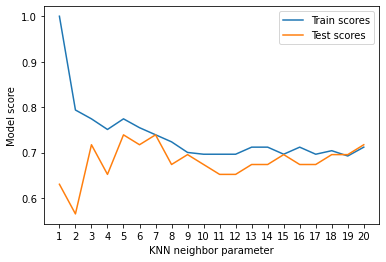

In [22]:
plt.plot(neighbors, train_scores, label= "Train scores")
plt.plot(neighbors, test_scores, label= "Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("KNN neighbor parameter")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score of the test data: {max(test_scores)*100:.2f}%");

 ### Hyperparameter tuning with RandomizedSearchCV
    
we're going to tune the models:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV()

In [23]:
# creating a hyperparameter grid for logistic regression
lr_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# creating a hyperparameter grid for random forest
rf_grid = {"n_estimators": np.arange(10, 1000, 20),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": (1,20,2)}

In [24]:
# Tuning LogisticRegression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= lr_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
rs_log_reg.score(X_test, y_test)

0.8695652173913043

In [27]:
# tuning random forest model
np.random.seed(42)

rs_ran_for = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions= rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_ran_for.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': (1, 20, 2),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510,
       530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770,
       790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990])},
                   verbose=True)

In [28]:
rs_ran_for.best_params_

{'n_estimators': 670,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 3}

In [29]:
rs_ran_for.score(X_test, y_test)

0.8913043478260869

### Hyperparameter tuning with GridSearchCV

In [30]:
# tuning the logistic regression model with gridsearchCV
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

np.random.seed(42)

log_reg_gd = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose=True)

log_reg_gd.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
log_reg_gd.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [32]:
log_reg_gd.score(X_test, y_test)

0.8695652173913043

### Hyperparameter tuning with gridsearchCV

In [39]:
# tuning the random forest model with grisearchCV
ran_for_gd = {"n_estimators": np.arange(650,710, 10),
             "max_depth": [3],
             "min_samples_split": np.arange(4,12,2),
             "min_samples_leaf": [2]}

np.random.seed(42)

gd_random = GridSearchCV(RandomForestClassifier(),
                        param_grid= ran_for_gd,
                        cv=5,
                        verbose=True)

gd_random.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3], 'min_samples_leaf': [2],
                         'min_samples_split': array([ 4,  6,  8, 10]),
                         'n_estimators': array([650, 660, 670, 680, 690, 700])},
             verbose=True)

In [40]:
gd_random.best_params_

{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 680}

In [41]:
gd_random.score(X_test, y_test)

0.8913043478260869

### Evaluating our machine learning classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision  
* Recall
* F1 score

...and if possible we'll use cross validation

In [42]:
y_preds = log_reg_gd.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [43]:
y_test.head(10)

257    0
18     1
96     1
211    0
150    1
191    0
285    0
40     1
219    0
302    0
Name: target, dtype: int64

C:\Users\sonam\desktop\ml-course\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


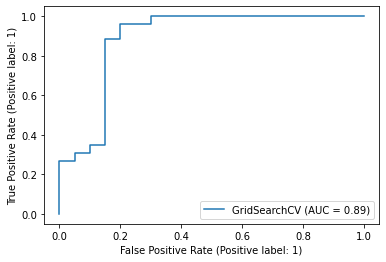

In [44]:
# plot ROC curve and calculate AUC metric
plot_roc_curve(log_reg_gd, X_test, y_test);

In [45]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[17  3]
 [ 3 23]]


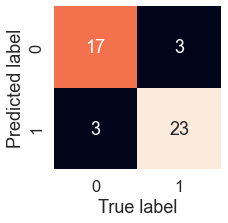

In [47]:
sns.set(font_scale= 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots confusion matrix using seaborn's heatmap():
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar= False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

Now we'll print the classification report as well as cross-validated precision, recall and f1-score...

In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.88      0.88      0.88        26

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall, f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [49]:
gd_random.best_params_

{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 680}

In [50]:
# creating new parameters with best parameters
clf = RandomForestClassifier(n_estimators= 680,
                            max_depth=3,
                            min_samples_split=8,
                            min_samples_leaf=2)

In [52]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring= "accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.83606557, 0.88333333, 0.78333333])

In [54]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8415300546448089

In [57]:
# cross_validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring= "precision")
cv_precision

array([0.78378378, 0.90909091, 0.84848485, 0.86111111, 0.75      ])

In [58]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8304941304941306

In [59]:
# cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring= "recall")
cv_recall

array([0.87878788, 0.90909091, 0.84848485, 0.93939394, 0.90909091])

In [60]:
cv_recall = np.mean(cv_recall)
cv_recall

0.8969696969696969

In [61]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring= "f1")
cv_f1

array([0.85714286, 0.89552239, 0.8358209 , 0.88571429, 0.82191781])

In [62]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8592236469316822

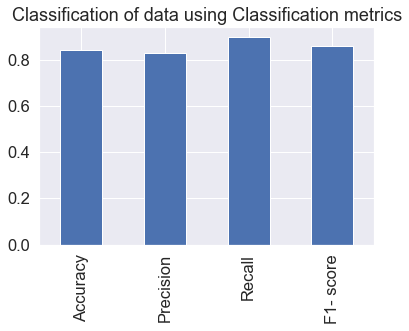

In [66]:
# visualize the data using bar graph
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1- score": cv_f1},
                         index= [0])

cv_metrics.T.plot.bar(title= "Classification of data using Classification metrics",
                    legend= False);

### Feature Importance

It is a parameter to judge which features contributed the most to the outcome of the model.

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
clf = RandomForestClassifier(n_estimators= 680,
                            max_depth=3,
                            min_samples_split=8,
                            min_samples_leaf=2)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=680)

In [71]:
clf.feature_importances_

array([0.03944883, 0.04181218, 0.2085596 , 0.02547005, 0.01826776,
       0.00306347, 0.00888997, 0.1246779 , 0.08379762, 0.1105599 ,
       0.0607438 , 0.10353647, 0.17117246])

In [75]:
#match feature importances with columns
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'age': 0.039448831776380686,
 'sex': 0.04181217791324025,
 'cp': 0.20855959951781716,
 'trestbps': 0.025470052423163532,
 'chol': 0.018267762575645892,
 'fbs': 0.0030634663170876334,
 'restecg': 0.008889968679648471,
 'thalach': 0.12467789585242947,
 'exang': 0.08379761668534841,
 'oldpeak': 0.1105598979279737,
 'slope': 0.06074379965395298,
 'ca': 0.10353647269730376,
 'thal': 0.17117245798000794}

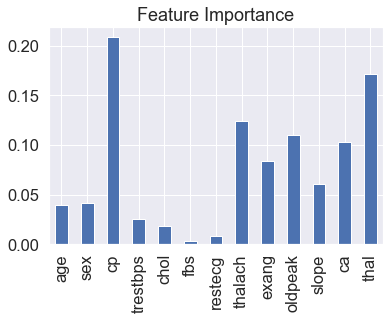

In [77]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index= [0])
feature_df.T.plot.bar(title= "Feature Importance", legend= False);

In [78]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes

In [79]:
pd.crosstab(df["fbs"], df["target"])

target,0,1
fbs,,
0,116,142
1,22,23
